**Прохоров Михаил, 4 курс, 3 группа**

**Лабораторная работа №2. Моделирование случайных величин.**

**Вариант 11: Бернулли – $Bi(1,p), p = 0.75;$ Пуассона – $П(λ), λ = 3$**

## Дискретные СВ

**1.1) Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений. Вывести на экран несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.**

In [1]:
import random
import math
import scipy
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

n = 1000
p = 0.75
l = 3

In [2]:
mersenne_twister = []
for _ in range(1000):
    mersenne_twister.append(random.uniform(0, 1))

In [3]:
bernulli = [1 if mt <= p else 0 for mt in mersenne_twister]

In [4]:
bernulli_math_expect = sum(bernulli) / n
print('Несмещённая оценка математического ожидания: ' + str(bernulli_math_expect))

bernulli_variance = 0
for x in bernulli:
    bernulli_variance += (x - bernulli_math_expect) ** 2
bernulli_variance /= n - 1
print('Несмещённая оценка дисперсии: ' + str(bernulli_variance))

Несмещённая оценка математического ожидания: 0.752
Несмещённая оценка дисперсии: 0.18668268268268645


In [5]:
print('Истинное значение математического ожидания: ' + str(p))
print('Истинное значение дисперсии: ' + str(p * (1 - p)))

Истинное значение математического ожидания: 0.75
Истинное значение дисперсии: 0.1875


In [6]:
def get_values(n, generator):
    values = []
    for i in range(n):
        values.append(next(generator))
    return values

In [7]:
def poisson_probability(k, l):
    return pow(l, k) / math.factorial(k) * math.exp(-l)

In [8]:
def poisson_generator(l):
    while True:
        a = random.uniform(0, 1)
        p = poisson_probability(0, l)
        k = 0
        while True:
            a = a - p
            if a < 0:
                break
            p *= l / (k + 1)
            k += 1
        yield k

In [9]:
pg = poisson_generator(l)
poisson = get_values(n, pg)

In [10]:
poisson_math_expect = sum(poisson) / n
print('Несмещённая оценка математического ожидания: ' + str(poisson_math_expect))

poisson_variance = 0
for x in poisson:
    poisson_variance += (x - poisson_math_expect) ** 2
poisson_variance /= n - 1
print('Несмещённая оценка дисперсии: ' + str(poisson_variance))

Несмещённая оценка математического ожидания: 2.944
Несмещённая оценка дисперсии: 3.238102102102101


In [11]:
print('Истинное значение математического ожидания: ' + str(l))
print('Истинное значение дисперсии: ' + str(l))

Истинное значение математического ожидания: 3
Истинное значение дисперсии: 3


**1.2) Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с 
истинными значениями**.

In [12]:
from scipy.stats import skew, kurtosis

print('Несмещённая оценка коэффициента эксцесса для реализации распределения Бернулли: ' + str(kurtosis(bernulli, axis=0, bias=False)))
print('Несмещённая оценка коэффициента асимметрии для реализации распределения Бернулли: ' + str(skew(bernulli, axis=0, bias=False)))
print('Несмещённая оценка коэффициента эксцесса для реализации распределения Пуассона: ' + str(kurtosis(poisson, axis=0, bias=False)))
print('Несмещённая оценка коэффициента асимметрии для реализации распределения Пуассона: ' + str(skew(poisson, axis=0, bias=False)))

Несмещённая оценка коэффициента эксцесса для реализации распределения Бернулли: -0.6351319122564232
Несмещённая оценка коэффициента асимметрии для реализации распределения Бернулли: -1.1688209264567373
Несмещённая оценка коэффициента эксцесса для реализации распределения Пуассона: 0.914558628147363
Несмещённая оценка коэффициента асимметрии для реализации распределения Пуассона: 0.7067214346525659


In [13]:
q = 1 - p
print('Истинное значение коэффициента эксцесса для реализации распределения Бернулли: ' + str((1 - 6 * p * q) / (p * q)))
print('Истинное значение коэффициента асимметрии для реализации распределения Бернулли: ' + str((q - p) / math.sqrt(p * q)))
print('Истинное значение коэффициента эксцесса для реализации распределения Пуассона: ' + str(l ** -1))
print('Истинное значение коэффициента асимметрии для реализации распределения Пуассона: ' + str(l ** -0.5))

Истинное значение коэффициента эксцесса для реализации распределения Бернулли: -0.6666666666666666
Истинное значение коэффициента асимметрии для реализации распределения Бернулли: -1.1547005383792517
Истинное значение коэффициента эксцесса для реализации распределения Пуассона: 0.3333333333333333
Истинное значение коэффициента асимметрии для реализации распределения Пуассона: 0.5773502691896257


**1.3) Построить гистограмму и сравнить с графиком теоретического распределения вероятностей (на одном графике).**

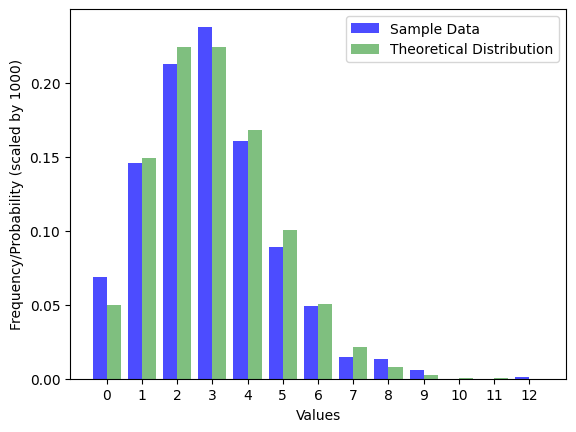

In [14]:
lambda_param = 3
sample_data = poisson

unique, counts = np.unique(sample_data, return_counts=True)
frequency = dict(zip(unique, counts))

theoretical_values = np.arange(0, max(unique) + 1)
p_theoretical = scipy.stats.poisson.pmf(theoretical_values, lambda_param)

sample_data_freq_scaled = {k: v / 1000 for k, v in frequency.items()}
p_theoretical_scaled = p_theoretical / 1000 * len(sample_data)

fig, ax = plt.subplots()

ax.bar(np.array(list(sample_data_freq_scaled.keys())) - 0.2, list(sample_data_freq_scaled.values()), width=0.4, color='blue', alpha=0.7, label='Sample Data')
ax.bar(np.array(theoretical_values) + 0.2, p_theoretical_scaled, width=0.4, color='green', alpha=0.5, label='Theoretical Distribution')

ax.set_xticks(theoretical_values)
ax.set_xlabel('Values')
ax.set_ylabel('Frequency/Probability (scaled by 1000)')
ax.legend()

plt.show()

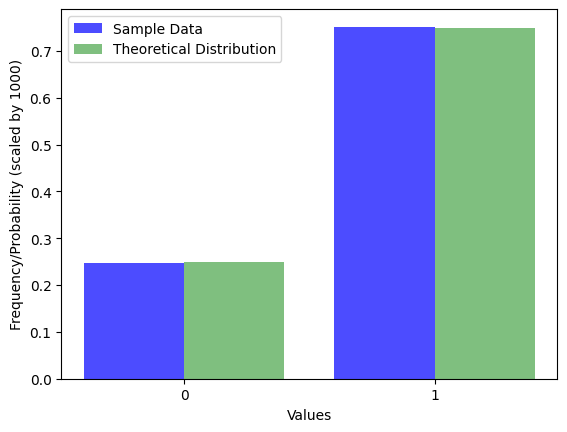

In [15]:
sample_data = bernulli

unique, counts = np.unique(sample_data, return_counts=True)
frequency = dict(zip(unique, counts))

p_theoretical = 0.75
q_theoretical = 1 - p_theoretical

sample_data_freq_scaled = {k: v / 1000 for k, v in frequency.items()}
p_theoretical_scaled = np.array([q_theoretical, p_theoretical]) / 1000 * len(sample_data)

fig, ax = plt.subplots()

ax.bar(np.array(list(sample_data_freq_scaled.keys())) - 0.2, list(sample_data_freq_scaled.values()), width=0.4, color='blue', alpha=0.7, label='Sample Data')
ax.bar(np.array([0, 1]) + 0.2, p_theoretical_scaled, width=0.4, color='green', alpha=0.5, label='Theoretical Distribution')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('Values')
ax.set_ylabel('Frequency/Probability (scaled by 1000)')
ax.legend()

plt.show()

**1.4) Построить график эмпирической функции распределения и сравнить с графиком теоретической функции распределения.**

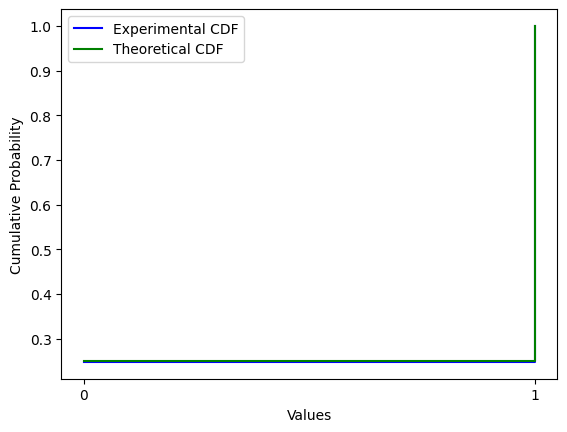

In [16]:
sample_data = bernulli

values, experimental_cdf = np.unique(sample_data, return_counts=True)
experimental_cdf = np.cumsum(experimental_cdf) / len(sample_data)

p_theoretical = 0.75
q_theoretical = 1 - p_theoretical

theoretical_values = np.array([0, 1])
theoretical_cdf = np.cumsum([q_theoretical, p_theoretical])

fig, ax = plt.subplots()

ax.step(values, experimental_cdf, where='post', color='blue', label='Experimental CDF')
ax.step(theoretical_values, theoretical_cdf, where='post', color='green', label='Theoretical CDF')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('Values')
ax.set_ylabel('Cumulative Probability')
ax.legend()

plt.show()

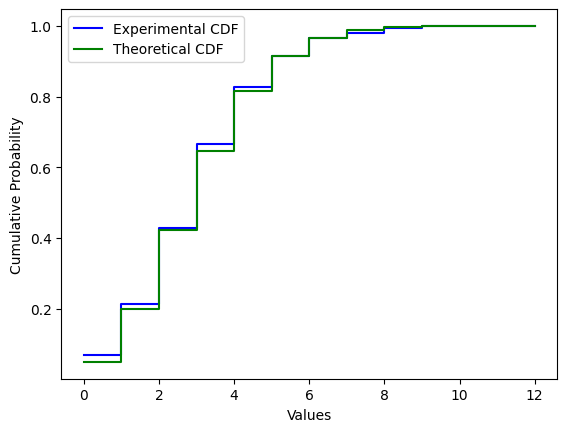

In [17]:
lambda_param = 3
sample_data = poisson

values, experimental_cdf = np.unique(sample_data, return_counts=True)
experimental_cdf = np.cumsum(experimental_cdf) / len(sample_data)

theoretical_values = np.arange(0, max(values) + 1)
p_theoretical = scipy.stats.poisson.pmf(theoretical_values, lambda_param)

theoretical_cdf = np.cumsum(p_theoretical)

fig, ax = plt.subplots()

ax.step(values, experimental_cdf, where='post', color='blue', label='Experimental CDF')
ax.step(theoretical_values, theoretical_cdf, where='post', color='green', label='Theoretical CDF')

ax.set_xlabel('Values')
ax.set_ylabel('Cumulative Probability')
ax.legend()

plt.show()

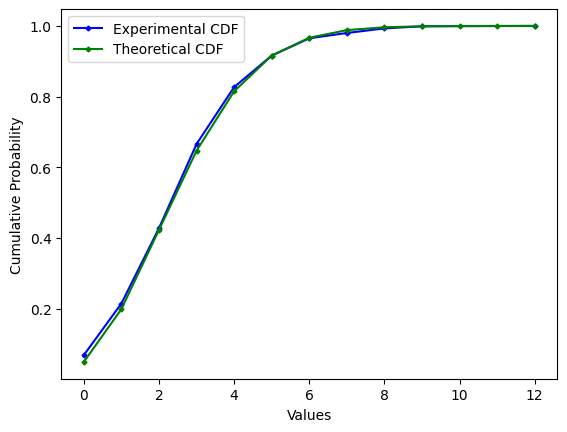

In [18]:
lambda_param = 3
sample_data = poisson

values, experimental_cdf = np.unique(sample_data, return_counts=True)
experimental_cdf = np.cumsum(experimental_cdf) / len(sample_data)

theoretical_values = np.arange(0, max(values) + 1)
p_theoretical = scipy.stats.poisson.pmf(theoretical_values, lambda_param)

theoretical_cdf = np.cumsum(p_theoretical)

fig, ax = plt.subplots()

ax.plot(values, experimental_cdf, color='blue', label='Experimental CDF', marker='D', markersize=2.5)
ax.plot(theoretical_values, theoretical_cdf, color='green', label='Theoretical CDF', marker='D', markersize=2.5)

ax.set_xlabel('Values')
ax.set_ylabel('Cumulative Probability')
ax.legend()

plt.show()

**1.5) Проверить принадлежность смоделированной последовательности к заданному распределению.**

In [19]:
data = bernulli

p_theoretical = 0.75

ks_statistic, p_value = scipy.stats.kstest(data, cdf=lambda x: scipy.stats.bernoulli.cdf(x, p_theoretical))

print("KS statistic for Bernoulli:", ks_statistic)
print("p-value for Bernoulli:", p_value)

KS statistic for Bernoulli: 0.752
p-value for Bernoulli: 0.0


In [20]:
lambda_param = 3
data = poisson

ks_statistic, p_value = scipy.stats.kstest(data, cdf=lambda x: scipy.stats.poisson.cdf(x, lambda_param))

print("KS statistic for Poisson:", ks_statistic)
print("p-value for Poisson:", p_value)

KS statistic for Poisson: 0.21923188878223127
p-value for Poisson: 1.1009600126438495e-42


## Непрерывные СВ

**2.1) Осуществить моделирование n = 10000 реализаций случайной величины из нормального закона распределения $N(m, s^2)$ с заданными параметрами. Для моделирования воспользоваться алгоритмом, основанным на ЦПТ (в качестве количества используемых слагаемых можно взять N = 48, или 192, но должна быть возможность быстро изменить данный параметр). Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.**

**Вариант 11: $m = 0, s^2 = 1$**

In [57]:
n = 10000
N = 48
m = 0
s2 = 1

In [58]:
normal = []
for _ in range(n):
    a = 0
    for _ in range(N):
        a += random.uniform(0, 1)
    normal.append((a - (1 / 2) * N) / (math.sqrt(1 / 12) * math.sqrt(N)))

In [59]:
normal_math_expect = sum(normal) / n
print('Несмещённая оценка математического ожидания: ' + str(normal_math_expect))

normal_variance = 0
for x in normal:
    normal_variance += (x - normal_math_expect) ** 2
normal_variance /= n - 1
print('Несмещённая оценка дисперсии: ' + str(normal_variance))

print('Истинное значение математического ожидания: ' + str(m))
print('Истинное значение дисперсии: ' + str(s2))

Несмещённая оценка математического ожидания: 0.004882257851496919
Несмещённая оценка дисперсии: 1.014844312384776
Истинное значение математического ожидания: 0
Истинное значение дисперсии: 1


**2.2) Смоделировать n = 10000 случайных величин из заданных абсолютно непрерывных распределений. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями (если это возможно). Если математического ожидания не существует, то вычислить выборочное значение медианы и сравнить его с теоретическим.**

Вариант 11: Лапласа $L(a), a = 0.5$; Вейбулла $W(a,b), a = 1, b = 0.5$

In [60]:
a = 0.5

In [61]:
laplace = []
for _ in range(n):
    y = random.uniform(0, 1)
    if y < 0.5:
        laplace.append(1 / a * math.log(2 * y))
    else:
        laplace.append(-1 / a * math.log(2 * (1 - y)))

In [62]:
laplace_math_expect = sum(laplace) / n
print('Несмещённая оценка математического ожидания: ' + str(laplace_math_expect))

laplace_variance = 0
for x in laplace:
    laplace_variance += (x - laplace_math_expect) ** 2
laplace_variance /= n - 1
print('Несмещённая оценка дисперсии: ' + str(laplace_variance))

print('Истинное значение математического ожидания: ' + str(0))
print('Истинное значение дисперсии: ' + str(2 / a ** 2))

Несмещённая оценка математического ожидания: 0.0005585246213916715
Несмещённая оценка дисперсии: 8.16954486740981
Истинное значение математического ожидания: 0
Истинное значение дисперсии: 8.0


In [69]:
a, b = 1, 0.5

In [75]:
weibull = []
for _ in range(n):
    y = random.uniform(0, 1)
    weibull.append(b * (-math.log(1 - y)) ** (1 / a))

In [76]:
from scipy.special import gamma

weibull_math_expect = sum(weibull) / n
print('Несмещённая оценка математического ожидания: ' + str(weibull_math_expect))

weibull_variance = 0
for x in weibull:
    weibull_variance += (x - weibull_math_expect) ** 2
weibull_variance /= n - 1
print('Несмещённая оценка дисперсии: ' + str(weibull_variance))

print('Истинное значение математического ожидания: ' + str(b * gamma(1 + 1 / a)))
print('Истинное значение дисперсии: ' + str(b ** 2 * gamma(1 + 2 / a) - (b * gamma(1 + 1 / a)) ** 2))

Несмещённая оценка математического ожидания: 0.49557790853047645
Несмещённая оценка дисперсии: 0.23812331377231172
Истинное значение математического ожидания: 0.5
Истинное значение дисперсии: 0.25


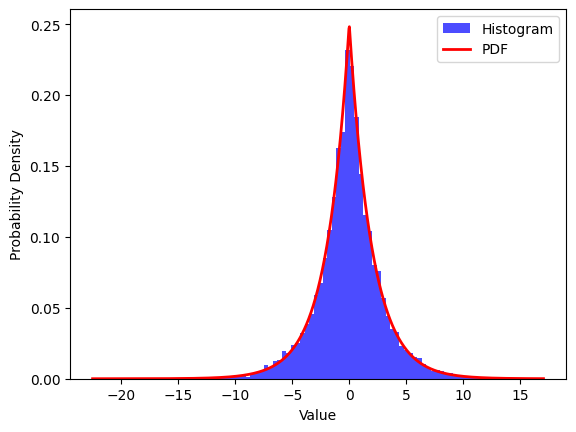

In [90]:
# Generate Laplace distribution samples
n = 10000
samples = laplace

# Create histogram
plt.hist(samples, bins=100, density=True, alpha=0.7, color='blue', label='Histogram')

# Create real probability density function plot
x = np.linspace(min(samples), max(samples), 1000)
pdf = scipy.stats.laplace.pdf(x, loc=0.0, scale=2)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

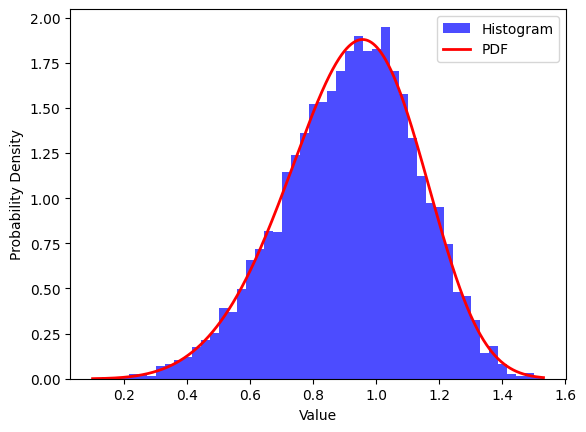

In [93]:
from scipy.stats import weibull_min

# Generate Weibull distribution samples
n = 10000
samples = np.random.weibull(5, size=n)

# Create histogram
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Histogram')

# Create real probability density function plot
x = np.linspace(min(samples), max(samples), 1000)
pdf = weibull_min.pdf(x, 5)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()
